# Logistic Regression Assignment

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/log_reg/employee-turnover-balanced.csv')
df.head()

,left_company,age,frequency_of_travel,department,commuting_distance,education,satisfaction_with_environment,gender,seniority_level,position,satisfaction_with_job,married_or_single,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
0,No,37,Travel_Rarely,Sales,16,4,4,Male,2,Sales Executive,3,Divorced,19,3,9,1,0,0,0
1,No,39,Travel_Rarely,Research & Development,3,2,3,Male,2,Laboratory Technician,3,Divorced,15,3,11,10,8,0,7
2,No,52,Travel_Frequently,Research & Development,25,4,3,Female,4,Manufacturing Director,4,Married,22,4,31,9,8,0,0
3,No,50,Non-Travel,Sales,1,3,4,Female,2,Sales Executive,3,Married,12,3,19,18,7,0,13
4,No,44,Travel_Rarely,Research & Development,4,3,4,Male,2,Healthcare Representative,2,Single,12,3,10,5,2,2,3


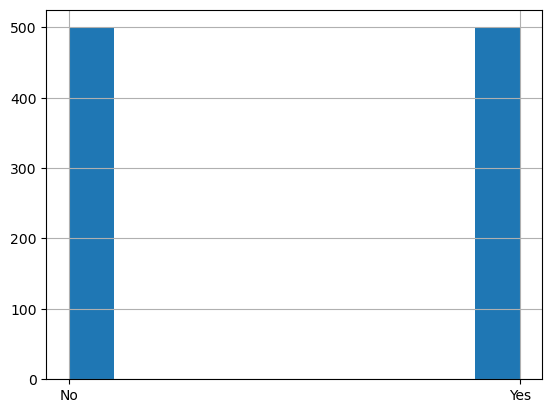

In [56]:
df['left_company'].hist()
plt.show()

* It's a categorical variables with just 2 categories.

In [70]:
numerical_vars = ['age','commuting_distance','last_raise_pct','total_years_working','years_at_company','last_performance_rating','years_in_current_job','years_since_last_promotion','years_with_current_supervisor']
print(numerical_vars)

['age', 'commuting_distance', 'last_raise_pct', 'total_years_working', 'years_at_company', 'last_performance_rating', 'years_in_current_job', 'years_since_last_promotion', 'years_with_current_supervisor']


In [71]:
categorical_Vars = ['frequency_of_travel','education','satisfaction_with_environment','department','gender','seniority_level','position','married_or_single']
print(categorical_Vars)

['frequency_of_travel', 'education', 'satisfaction_with_environment', 'department', 'gender', 'seniority_level', 'position', 'married_or_single']


In [73]:
n=df[['age','commuting_distance','last_raise_pct','total_years_working','years_at_company','years_in_current_job','years_since_last_promotion','years_with_current_supervisor']]

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame() 
vif["numerical"] = n.columns 

vif["VIF Scores"] = [variance_inflation_factor(n.values, i) for i in range(len(n.columns))] 
  
display(vif)

,numerical,VIF Scores
0,age,16.669850
1,commuting_distance,2.389730
2,last_raise_pct,10.656507
3,total_years_working,7.622769
4,years_at_company,9.588173
5,years_in_current_job,7.656341
6,years_since_last_promotion,2.590716
7,years_with_current_supervisor,6.888652


In [75]:
n.drop(n[['age','last_raise_pct','total_years_working','years_at_company','years_in_current_job','years_with_current_supervisor']],axis=1)

,commuting_distance,years_since_last_promotion
0,16,0
1,3,0
2,25,0
3,1,0
4,4,2
...,...,...
995,3,0
996,4,7
997,5,0
998,2,2


* Here, I'm just keeping 'commuting_distance', 'years_since_last_promotion' in order to fix the multicolinearity.

In [80]:
df1=df.drop(df[['left_company','position','age','last_raise_pct','total_years_working','years_at_company','years_in_current_job','years_with_current_supervisor']],axis=1)

In [81]:
df1

,commuting_distance,satisfaction_with_job,years_since_last_promotion,frequency_of_travel_Non-Travel,frequency_of_travel_Travel_Frequently,frequency_of_travel_Travel_Rarely,department_Human Resources,department_Research & Development,department_Sales,education_1,...,seniority_level_1,seniority_level_2,seniority_level_3,seniority_level_4,seniority_level_5,married_or_single_Divorced,married_or_single_Married,married_or_single_Single,last_performance_rating_3,last_performance_rating_4
0,16,3,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1,3,3,0,0,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,25,4,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
3,1,3,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
4,4,2,2,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,3,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
996,4,4,7,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0
997,5,2,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
998,2,4,2,0,0,1,0,1,0,0,...,1,0,0,0,0,0,1,0,1,0


In [92]:
df2=df[['left_company']]
df2

,left_company
0,No
1,No
2,No
3,No
4,No
...,...
995,Yes
996,Yes
997,Yes
998,Yes


In [94]:
pd.get_dummies(df2)

,left_company_No,left_company_Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
995,0,1
996,0,1
997,0,1
998,0,1


In [95]:
X=df1.values
y=df2.values

In [96]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=124)

In [97]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [98]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [99]:
y_pred=log_reg.predict(X_test)

In [100]:
print("Training Accuracy:{:.3f}".format(log_reg.score(X_train,y_train)))

print('Testing Accuracy:{:.3f}'.format(log_reg.score(X_test,y_test)))

Training Accuracy:0.751
Testing Accuracy:0.690


In [101]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[61 32]
 [30 77]]
